# Face API Sample

In [1]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont

In [2]:
subscription_key = ''

In [3]:
face_api_url = ''

In [4]:
image_url = 'http://www.entermedia.co.kr/news/photo/202005/10914_27367_543.jpg'

In [5]:
img = Image.open(BytesIO(requests.get(image_url).content))

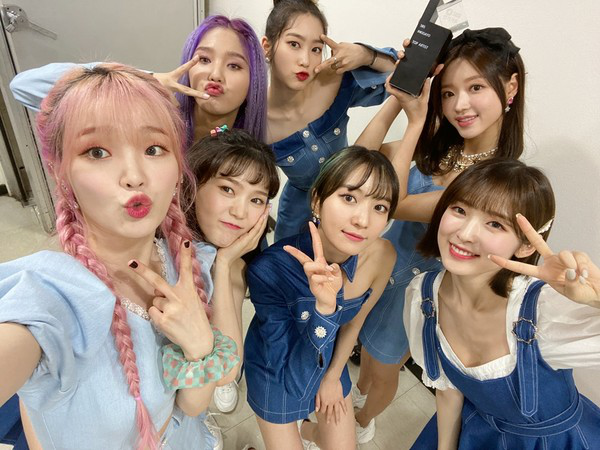

In [6]:
img

In [7]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}

In [8]:
params = {
    'returnFaceId':'true',
    'returnFacelandmarks':'false',
    'returnFaceAttributes':'age,gender,emotion'
}

In [9]:
data = {'url': image_url}

In [10]:
response = requests.post(face_api_url, params=params, headers=headers, json=data)

In [11]:
faces = response.json()

In [12]:
faces

[{'faceId': 'dbf4f667-eea1-4107-b03b-a642bf1c3a78',
  'faceRectangle': {'top': 117, 'left': 67, 'width': 125, 'height': 125},
  'faceAttributes': {'gender': 'female',
   'age': 20.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.146,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 0.0,
    'neutral': 0.605,
    'sadness': 0.001,
    'surprise': 0.247}}},
 {'faceId': 'a286ea27-9152-41f6-afd9-17880786c0f9',
  'faceRectangle': {'top': 193, 'left': 430, 'width': 79, 'height': 79},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.0,
    'disgust': 0.0,
    'fear': 0.0,
    'happiness': 1.0,
    'neutral': 0.0,
    'sadness': 0.0,
    'surprise': 0.0}}},
 {'faceId': '751386ab-3d1e-435e-9815-0ddb2955bcca',
  'faceRectangle': {'top': 182, 'left': 324, 'width': 72, 'height': 72},
  'faceAttributes': {'gender': 'female',
   'age': 23.0,
   'emotion': {'anger': 0.0,
    'contempt': 0.017,
    'disgust': 0.0,
    'fear': 0.0,
    'happi

## 얼굴 이정표
[얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/concepts/face-detection)
![얼굴이정표](https://docs.microsoft.com/ko-kr/azure/cognitive-services/face/images/landmarks.1.jpg)

In [13]:
def CreateImage(faces):
    for face in faces:
        
        #사각형을 출력하기 위한 부분
        rect = face['faceRectangle']
        top = rect['top']
        left = rect['left']
        bottom = rect['height'] + top
        right = rect['width'] + left
        
        draw.rectangle(((left,top),(right,bottom)), outline='red')
        
        #글씨를 쓰기 위한 부분
        fontX = left
        fontY = top - 27
        
        face_info = face['faceAttributes']
        gender = face_info['gender']
        age = face_info['age']
        result = 'Gender: {0}\n Age: {1}'.format(gender,age)
        
        draw.text((fontX,fontY), result, fill='red')

In [14]:
draw = ImageDraw.Draw(img)

In [15]:
CreateImage(faces)

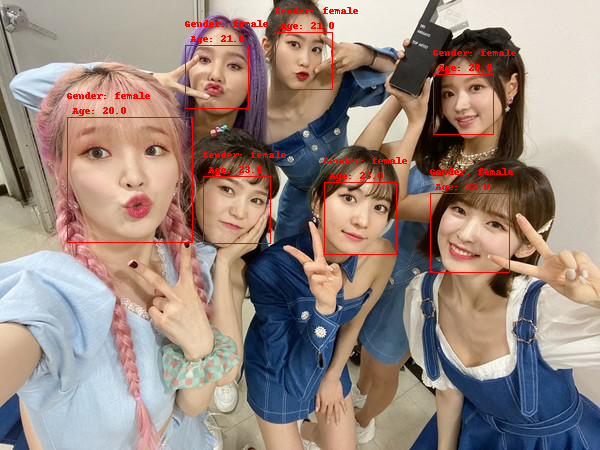

In [16]:
img